# Text Mining Project
## <span style="color:blue">Group</span>
<span style="color:blue">Beatriz Gonçalves - 20210695 | Gonçalo Lopes - 20210679 | Guilherme Simões - 20211003<span/>

In [1]:
# Data Import
import os
import numpy as np
import pandas as pd
import random
import re

# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string
from tqdm import tqdm_notebook as tqdm

# Count Vectorizer and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# KNN
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# SVC
from sklearn import svm

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1. Data import

In [2]:
def dataImport(filename):
    # Open the .txt file
    df = open(filename, "r")
    lines = df.readlines() # Separate every line
    df.close()

    values = []
    columns = []

    # Remove /n at the end of each line and separate the sentence from the emotion
    for index, line in enumerate(lines):
        values.append(line.strip().split('\t'))
        columns = values[0]

    values.pop(0) # Remove the columns name

    # Create a dataframe and convert the data to 2 columns
    df = pd.DataFrame(data=values, columns=columns)
    
    return df

In [3]:
df_train = dataImport('Data-20220509/training_set.txt')
df_dev = dataImport('Data-20220509/dev_set.txt')
df_test = dataImport('Data-20220509/test_set.txt')

In [4]:
df_train.head()

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1


In [5]:
df_train.shape

(14000, 2)

In [6]:
df_dev.head()

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1


In [7]:
df_dev.shape

(1000, 2)

In [8]:
df_test.head()

,sentence
0,"Come , let's go get that automobile ."
1,"Well , some other time , then ?"
2,He's in trouble . Boy ?
3,Criminal gang unit to take control .
4,By Molto . No discussion . Interview .


In [9]:
df_test.shape

(2000, 1)

## 2. Text Preprocessing

In [10]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/Beatriz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Beatriz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Beatriz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

We noticed that there are some empty sentences, so we went to see which words present in those sentences cannot be removed with the stopwords list.

In [11]:
snowball_stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

# List of sentences' indexes that have important words that cannot be deleted
list_of_words_not_to_remove = ['no', 'here', 'more', 'all', 'up', 'after', 'again', 'just',
                               'i', 'now', 'had', 'but', 'did', 'is', 'we', 'the', 'wouldn',
                               'been', 'too', 'won', 'for', 'him', 'not', 'over', 'shan', 'than',
                               'can', 'out', 'will', 'me', 'any', 'have', 'should', 'do', 'd',
                               'be', 'how', 'are', 'what', 'you', 'if', "was", "who", 'because',
                               'where', "doing", "ain", "am", "re", 've', 'against', 'very', 'm',
                               'with', 'there', 'does', 'has', 'were', 'don', 't', 'mightn', 'hasn',
                               'hadn', 'couldn', 'weren', 'wasn', 'didn', 'shouldn', 'isn', 'mustn',
                               'haven', 'doesn', 'needn', 'when', 'that', 's', 'll', 'aren']

stop = list()
for v in stop_words:
    if v not in list_of_words_not_to_remove:
        stop.append(v)

stop_words = stop
stop_words

['his',
 'above',
 'before',
 'yourselves',
 'your',
 'why',
 'same',
 "don't",
 'further',
 'y',
 'as',
 "you're",
 'yourself',
 'themselves',
 'having',
 'both',
 'own',
 'he',
 'under',
 'during',
 'each',
 'ours',
 'this',
 'ma',
 'from',
 "weren't",
 'most',
 "it's",
 'our',
 "hasn't",
 "that'll",
 'until',
 'they',
 'an',
 'and',
 'it',
 'down',
 'through',
 'to',
 'itself',
 "mustn't",
 'them',
 'on',
 "mightn't",
 'theirs',
 'other',
 "you've",
 'their',
 'once',
 'she',
 "hadn't",
 'in',
 'or',
 'below',
 "won't",
 'whom',
 'few',
 "you'll",
 "doesn't",
 'a',
 'off',
 'such',
 'which',
 'its',
 'ourselves',
 'nor',
 'her',
 "needn't",
 "she's",
 "isn't",
 "shouldn't",
 'herself',
 'about',
 'myself',
 'some',
 "wasn't",
 'these',
 'by',
 "haven't",
 'into',
 'hers',
 'himself',
 'yours',
 'my',
 'being',
 'at',
 "you'd",
 'between',
 'o',
 'then',
 'while',
 'of',
 "wouldn't",
 'those',
 "didn't",
 "shan't",
 "should've",
 'so',
 "couldn't",
 "aren't",
 'only']

In [12]:
def preprocessing(text):
    """
        text: a string

        return: modified initial string
    """
    # HTML decoding
    text = BeautifulSoup(text).get_text()

    # lowercase text
    text = text.lower()

    # Remove digits and special characters
    text = re.sub("[^a-zA-Z!?]", ' ', text)

    # Delete stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Stemming
    text = " ".join(snowball_stemmer.stem(word) for word in text.split())

    return text

In [13]:
df_train['sentence'] = df_train['sentence'].apply(preprocessing)
df_train.head()

,sentence,emotion
0,i m too old be trade,6
1,mother said you could alway tell ladi hand,8
2,i alway said i d leav when the time came,6
3,ll be safe with me,2
4,lay,1


In [14]:
dev_sentence = df_dev['sentence']
df_dev['sentence'] = df_dev['sentence'].apply(preprocessing)
df_dev.head()

,sentence,emotion
0,what happen the gold safe ?,4
1,natur get cold feet,8
2,not veri lucki is ?,7
3,i m just littl anxious get up there whoop et s...,2
4,did you think we don t know affair with govern...,1


In [15]:
test_sentence = df_test['sentence']
df_test['sentence'] = df_test['sentence'].apply(preprocessing)
df_test.head()

,sentence
0,come let s go get that automobil
1,well time ?
2,s troubl boy ?
3,crimin gang unit take control
4,molto no discuss interview


## 3. Feature extraction using Bag-of-words and TF-IDF Transformer

In [16]:
cv = CountVectorizer(max_df=0.8, binary=True, ngram_range=(1,1))

x_train = cv.fit_transform(df_train['sentence'])
y_train = np.array(df_train["emotion"])

tfidf_vectorizer = TfidfTransformer()
tfidf_vectorizer.fit(x_train, y_train)

x_dev = tfidf_vectorizer.transform(cv.transform(df_dev["sentence"]))
y_dev = np.array(df_dev["emotion"])

x_test = tfidf_vectorizer.transform(cv.transform(df_test["sentence"]))

x_train.shape, y_train.shape, x_dev.shape, y_dev.shape, x_test.shape

((14000, 5294), (14000,), (1000, 5294), (1000,), (2000, 5294))

### 3.1. Training the model using KNN

In [17]:
# Clustering the reviews with a KNN classifier
# n_neighbors=7 has the best accuracy
modelknn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)
# fit model on the training dataset
modelknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     n_neighbors=7, weights='distance')

#### 3.1.1. Testing the model

In [18]:
predict_dev = modelknn.predict(x_dev)

#### 3.1.2. Evaluation

In [19]:
emotions = {1: 'Anger', 2: 'Anticipation', 3: 'Disgust', 4: 'Fear', 5: 'Joy', 6: 'Sadness', 7: 'Surprise', 8: 'Trust'}
print('Classification Report', classification_report(predict_dev, y_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.46      0.34      0.39       291
Anticipation       0.36      0.39      0.37       157
     Disgust       0.10      0.22      0.14        36
        Fear       0.27      0.29      0.28        97
         Joy       0.44      0.37      0.40       116
     Sadness       0.21      0.24      0.22        75
    Surprise       0.22      0.30      0.25        69
       Trust       0.38      0.38      0.38       159

    accuracy                           0.34      1000
   macro avg       0.31      0.32      0.31      1000
weighted avg       0.36      0.34      0.35      1000



In [20]:
confusion_matrix(predict_dev, y_dev)

array([[98, 39, 28, 21, 16, 29, 28, 32],
       [23, 61, 13, 16, 11,  8,  9, 16],
       [11,  3,  8,  5,  1,  4,  3,  1],
       [19, 10,  6, 28,  5, 11,  6, 12],
       [10, 16,  4,  2, 43,  7, 12, 22],
       [18,  3,  7,  8,  4, 18,  9,  8],
       [15,  8,  4,  7,  4,  3, 21,  7],
       [17, 30,  7, 17, 13,  7,  8, 60]])

In [21]:
def plot_cm(confusion_matrix : np.array, classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.RdYlBu)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j], ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    
    return plt.show()

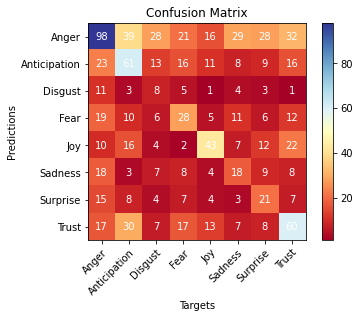

In [22]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 3.1.3. Checking overfitting

In [23]:
def checking_overfitting(model):
    predict_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, predict_train)
    
    predict_dev = model.predict(x_dev)
    dev_acc = accuracy_score(y_dev, predict_dev)

    return train_acc, dev_acc

In [24]:
checking_overfitting(modelknn)

(0.9852142857142857, 0.337)

### 3.2. Training the model using Random Forest

In [25]:
# Clustering the reviews with a Random Forest classifier
modelrf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=1, random_state=1)
# Fit model on the training dataset
modelrf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=1, oob_score=True, random_state=1)

#### 3.2.1. Testing the model

In [26]:
predict_dev = modelrf.predict(x_dev)

#### 3.2.2. Evaluation

In [27]:
print(classification_report(predict_dev, y_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.70      0.25      0.37       590
Anticipation       0.15      0.35      0.21        72
     Disgust       0.04      0.20      0.07        15
        Fear       0.16      0.24      0.19        71
         Joy       0.28      0.33      0.30        81
     Sadness       0.16      0.23      0.19        62
    Surprise       0.12      0.31      0.18        39
       Trust       0.18      0.40      0.25        70

    accuracy                           0.27      1000
   macro avg       0.22      0.29      0.22      1000
weighted avg       0.48      0.27      0.31      1000



In [28]:
confusion_matrix(predict_dev, y_dev)

array([[147, 102,  56,  57,  45,  53,  54,  76],
       [ 18,  25,   7,   3,   4,   1,   7,   7],
       [  3,   4,   3,   1,   2,   0,   1,   1],
       [  9,   9,   4,  17,   1,   9,   6,  16],
       [  6,   9,   3,   3,  27,   5,   9,  19],
       [ 15,   6,   3,  12,   3,  14,   4,   5],
       [  7,   2,   1,   4,   4,   3,  12,   6],
       [  6,  13,   0,   7,  11,   2,   3,  28]])

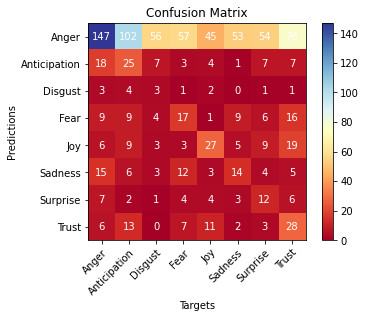

In [29]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 3.2.3. Checking overfitting

In [30]:
checking_overfitting(modelrf)

(0.9852142857142857, 0.273)

### 3.3. Training the model using XGBoost (Best model)

In [31]:
# The class column has to start from 0 (as required since version 1.3.2). Therefore, we used LabelEncoder.
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [32]:
# Clustering the reviews with a XGBoost classifier
modelxgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# fit model on the training dataset
modelxgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

#### 3.3.1. Testing the model

In [33]:
predict_dev = modelxgb.predict(x_dev)
predict_test = modelxgb.predict(x_test)

In [34]:
y_dev = le.fit_transform(y_dev)

#### 3.3.2. Evaluation

In [35]:
print(classification_report(y_dev, predict_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.33      0.66      0.44       211
Anticipation       0.41      0.42      0.42       170
     Disgust       0.24      0.12      0.16        77
        Fear       0.43      0.22      0.29       104
         Joy       0.47      0.40      0.43        97
     Sadness       0.36      0.24      0.29        87
    Surprise       0.35      0.18      0.23        96
       Trust       0.43      0.35      0.38       158

    accuracy                           0.38      1000
   macro avg       0.38      0.32      0.33      1000
weighted avg       0.38      0.38      0.36      1000



In [36]:
confusion_matrix(predict_dev, y_dev)

array([[139,  46,  39,  42,  19,  34,  52,  45],
       [ 24,  72,   8,  11,  15,  10,  10,  25],
       [ 13,   5,   9,   1,   3,   1,   1,   4],
       [  7,   9,   3,  23,   2,   6,   2,   2],
       [  0,   8,   1,   5,  39,  10,   2,  18],
       [  9,   1,   6,   5,   5,  21,   8,   3],
       [  7,   5,   3,   4,   4,   3,  17,   6],
       [ 12,  24,   8,  13,  10,   2,   4,  55]])

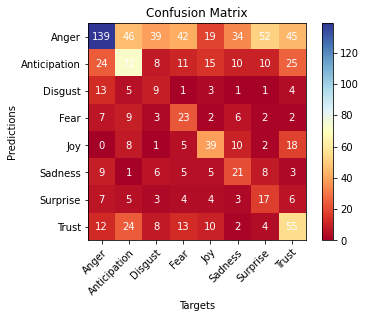

In [37]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 3.3.3. Checking overfitting

In [38]:
checking_overfitting(modelxgb)

(0.5165, 0.375)

**Since this was our best model, we saved the results of the dev set in a file named dev_results.txt. Thus, each sentence is followed by a tab character and the label predicted by the model XGBoost.**

In [72]:
filename = open("dev_results.txt", "w+")

for idx, sentence in enumerate(dev_sentence):
    filename.write(sentence + '\t' + str(predict_dev[idx]+1) + '\n')

filename.close()

**Since this was our best model, we saved the results of the test set in a file named test_results.txt. Thus, each sentence is followed by a tab character and the label predicted by the model XGBoost.**

In [73]:
filename = open("test_results.txt", "w+")

for idx, sentence in enumerate(test_sentence):
    filename.write(sentence + '\t' + str(predict_test[idx]+1) + '\n')

filename.close()

### 3.4. Training the model using SVC

In [41]:
# Clustering the reviews with a SVC with a linear Kernel
classifier_linear = svm.SVC(kernel='linear')
# fit model on the training dataset
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear')

#### 3.4.1. Testing the model

In [42]:
predict_dev = classifier_linear.predict(x_dev)

#### 3.4.2. Evaluation

In [43]:
print(classification_report(y_dev, predict_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.33      0.67      0.44       211
Anticipation       0.36      0.40      0.38       170
     Disgust       0.31      0.05      0.09        77
        Fear       0.33      0.18      0.24       104
         Joy       0.40      0.43      0.41        97
     Sadness       0.41      0.16      0.23        87
    Surprise       0.46      0.17      0.24        96
       Trust       0.34      0.29      0.32       158

    accuracy                           0.35      1000
   macro avg       0.37      0.29      0.29      1000
weighted avg       0.36      0.35      0.32      1000



In [44]:
confusion_matrix(predict_dev, y_dev)

array([[142,  50,  40,  50,  20,  36,  43,  52],
       [ 25,  68,  15,  11,  15,  11,  11,  32],
       [  4,   1,   4,   1,   0,   0,   1,   2],
       [ 10,   6,   3,  19,   2,   7,   7,   3],
       [  5,  13,   3,   4,  42,   9,  11,  19],
       [  7,   1,   2,   4,   2,  14,   2,   2],
       [  2,   4,   4,   3,   2,   2,  16,   2],
       [ 16,  27,   6,  12,  14,   8,   5,  46]])

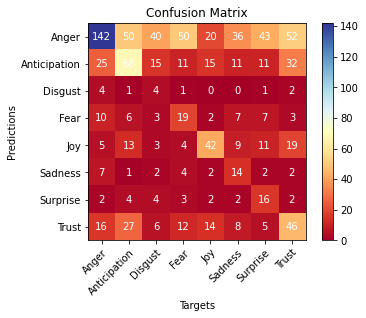

In [45]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 3.4.3. Checking overfitting

In [46]:
checking_overfitting(classifier_linear)

(0.6832857142857143, 0.351)

## 4. Feature extraction using TF-IDF Vectorizer

In [47]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True)

x_train = vectorizer.fit_transform(df_train['sentence'])
x_dev = vectorizer.transform(df_dev['sentence'])

x_train.shape, y_train.shape, x_dev.shape, y_dev.shape

((14000, 1461), (14000,), (1000, 1461), (1000,))

### 4.1. Training the model using KNN

In [48]:
# Clustering the reviews with a KNN classifier
# n_neighbors=7 has the best accuracy
modelknn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)
# fit model on the training dataset
modelknn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=1,
                     n_neighbors=7, weights='distance')

#### 4.1.1. Testing the model

In [49]:
predict_dev = modelknn.predict(x_dev)

#### 4.1.2. Evaluation

In [50]:
print(classification_report(predict_dev, y_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.50      0.36      0.42       292
Anticipation       0.35      0.36      0.35       164
     Disgust       0.10      0.17      0.13        47
        Fear       0.24      0.27      0.25        93
         Joy       0.36      0.32      0.34       111
     Sadness       0.22      0.28      0.25        68
    Surprise       0.23      0.28      0.25        79
       Trust       0.35      0.38      0.36       146

    accuracy                           0.33      1000
   macro avg       0.29      0.30      0.29      1000
weighted avg       0.35      0.33      0.34      1000



In [51]:
confusion_matrix(predict_dev, y_dev)

array([[105,  38,  24,  26,  14,  24,  32,  29],
       [ 21,  59,  15,  15,  10,  11,  11,  22],
       [ 11,  10,   8,   4,   1,   4,   2,   7],
       [ 21,  10,   6,  25,   6,   8,   6,  11],
       [  8,  15,   5,   4,  35,   9,  12,  23],
       [ 14,   6,   4,   8,   7,  19,   6,   4],
       [ 12,  12,   8,   7,   6,   5,  22,   7],
       [ 19,  20,   7,  15,  18,   7,   5,  55]])

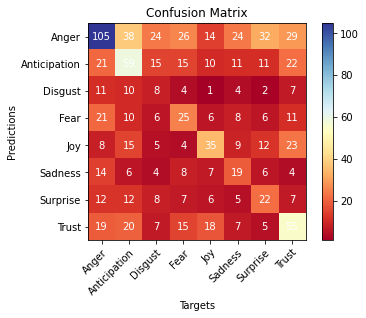

In [52]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 4.1.3. Checking overfitting

In [53]:
checking_overfitting(modelknn)

(0.9652142857142857, 0.328)

### 4.2. Training the model using Random Forest

In [54]:
# Clustering the reviews with a Random Forest classifier
modelrf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=1, random_state=1)
# fit model on the training dataset
modelrf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=1, oob_score=True, random_state=1)

#### 4.2.1. Testing the model

In [55]:
predict_dev = modelrf.predict(x_dev)

#### 4.2.2. Evaluation

In [56]:
print(classification_report(predict_dev, y_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.63      0.35      0.45       374
Anticipation       0.42      0.41      0.42       176
     Disgust       0.08      0.15      0.10        41
        Fear       0.21      0.35      0.26        63
         Joy       0.41      0.37      0.39       107
     Sadness       0.28      0.41      0.33        58
    Surprise       0.19      0.33      0.24        55
       Trust       0.32      0.40      0.36       126

    accuracy                           0.36      1000
   macro avg       0.32      0.35      0.32      1000
weighted avg       0.44      0.36      0.38      1000



In [57]:
confusion_matrix(predict_dev, y_dev)

array([[132,  42,  36,  38,  16,  28,  42,  40],
       [ 23,  72,   9,  16,  16,   7,   7,  26],
       [ 10,   5,   6,   3,   5,   4,   6,   2],
       [  7,  10,   7,  22,   0,   7,   4,   6],
       [  3,  13,   3,   6,  40,  10,   7,  25],
       [ 11,   3,   4,   3,   3,  24,   8,   2],
       [  7,  10,   3,   8,   3,   0,  18,   6],
       [ 18,  15,   9,   8,  14,   7,   4,  51]])

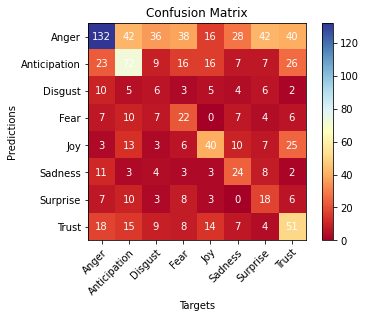

In [58]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 4.2.3. Checking overfitting

In [59]:
checking_overfitting(modelrf)

(0.9655714285714285, 0.365)

### 4.3. Training the model using XGBoost

In [60]:
# Clustering the reviews with a XGBoost classifier
modelxgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# fit model on the training dataset
modelxgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

#### 4.3.1. Testing the model

In [61]:
predict_dev = modelxgb.predict(x_dev)

#### 4.3.2. Evaluation

In [62]:
print(classification_report(y_dev, predict_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.33      0.63      0.43       211
Anticipation       0.41      0.39      0.40       170
     Disgust       0.22      0.10      0.14        77
        Fear       0.35      0.21      0.27       104
         Joy       0.42      0.38      0.40        97
     Sadness       0.27      0.21      0.24        87
    Surprise       0.37      0.23      0.28        96
       Trust       0.40      0.31      0.35       158

    accuracy                           0.36      1000
   macro avg       0.35      0.31      0.31      1000
weighted avg       0.36      0.35      0.34      1000



In [63]:
confusion_matrix(predict_dev, y_dev)

array([[133,  45,  41,  46,  19,  34,  39,  48],
       [ 22,  66,   8,   9,  13,  11,   6,  25],
       [ 14,   6,   8,   1,   1,   2,   0,   4],
       [  7,   9,   5,  22,   1,   8,   5,   5],
       [  0,  10,   4,   6,  37,   7,   7,  18],
       [ 12,   5,   5,   4,   4,  18,  12,   6],
       [ 10,   9,   2,   5,   6,   3,  22,   3],
       [ 13,  20,   4,  11,  16,   4,   5,  49]])

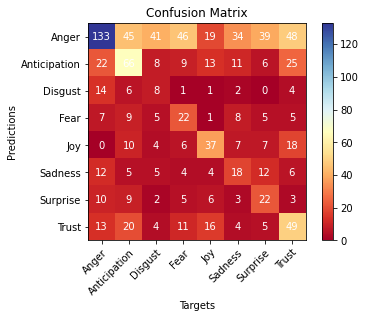

In [64]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 4.3.3. Checking overfitting

In [65]:
checking_overfitting(modelxgb)

(0.6192142857142857, 0.355)

### 4.4. Training the model using SVC

In [66]:
# Clustering the reviews with a SVC with a linear Kernel
classifier_linear = svm.SVC(kernel='linear')
# Fit model on the training dataset
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear')

#### 4.4.1. Testing the model

In [67]:
predict_dev = classifier_linear.predict(x_dev)

#### 4.4.2. Evaluation

In [68]:
print(classification_report(y_dev, predict_dev, target_names=emotions.values()))

              precision    recall  f1-score   support

       Anger       0.35      0.59      0.44       211
Anticipation       0.42      0.49      0.45       170
     Disgust       0.10      0.04      0.06        77
        Fear       0.41      0.21      0.28       104
         Joy       0.43      0.40      0.42        97
     Sadness       0.35      0.29      0.31        87
    Surprise       0.34      0.23      0.27        96
       Trust       0.41      0.35      0.38       158

    accuracy                           0.37      1000
   macro avg       0.35      0.32      0.33      1000
weighted avg       0.37      0.37      0.36      1000



In [69]:
confusion_matrix(predict_dev, y_dev)

array([[124,  44,  37,  33,  12,  31,  36,  40],
       [ 24,  83,  10,  13,  18,   9,  13,  27],
       [ 11,   4,   3,   2,   3,   2,   1,   3],
       [  9,   4,   6,  22,   1,   5,   4,   3],
       [  1,   8,   4,   5,  39,   8,   6,  19],
       [ 16,   3,   6,   4,   6,  25,   7,   5],
       [ 10,   8,   3,   8,   6,   3,  22,   5],
       [ 16,  16,   8,  17,  12,   4,   7,  56]])

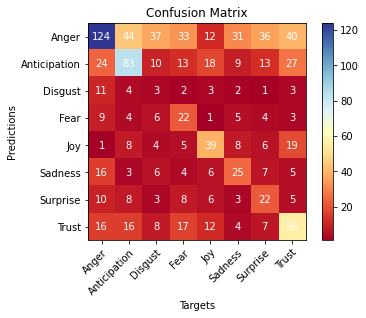

In [70]:
plot_cm(confusion_matrix(predict_dev, y_dev), emotions.values())

#### 4.4.3. Checking overfitting

In [71]:
checking_overfitting(classifier_linear)

(0.5045, 0.374)